In [14]:
import numpy as np
from scipy.stats import kstest
from scipy.stats import levene
from scipy.stats import f_oneway
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

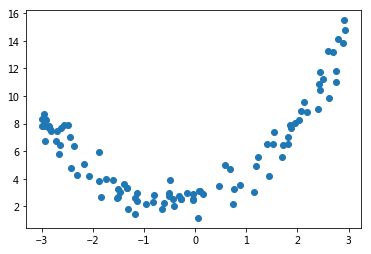

In [3]:
# np.seed(10)
x = np.random.uniform(-3, 3, size=100)
X=x.reshape(-1,1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

[array([0.75765539]), 6.0932922653779285]

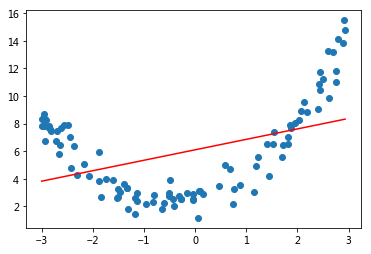

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
y_pred2=lr.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred2[np.argsort(x)],color='r')
[lr.coef_,lr.intercept_]

[array([0.96691727, 0.98686785]), 2.4820758338010447]

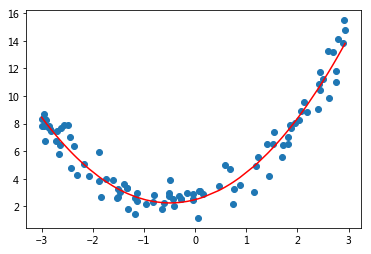

In [4]:
X2=np.hstack([X, X**2])#按列进行数组堆叠
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X2,y)
y_pred2=lr.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_pred2[np.argsort(x)],color='r')
[lr.coef_,lr.intercept_]

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y)
def PolynomialRegression(degree):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('lin_reg',LinearRegression())
    ])
    return pipeline

def ModelFit(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('MSE:%s' %mean_squared_error(y_pred,y_test))
    plot_x=np.linspace(-3,3,100).reshape(100,1)
    plot_y=model.predict(plot_x)
    plt.scatter(X,y)
    plt.axis([-3,3,0,10])#显示x,y轴范围
    plt.plot(plot_x[:,0],plot_y,color='r')
    plt.show()

MSE:0.9058829067729919


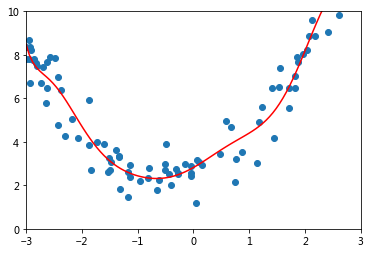

In [10]:
ModelFit(PolynomialRegression(10))

MSE:0.768123465970933


/Users/rickie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


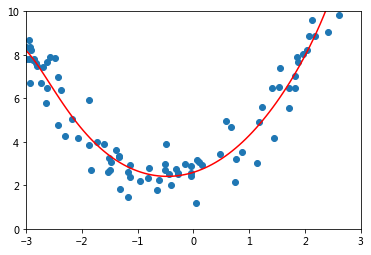

In [11]:
def LassoRegression(degree,alpha):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('lasso',Lasso(alpha))
    ])
    return pipeline
ModelFit(LassoRegression(10,0.01))

MSE:0.8566682106355227


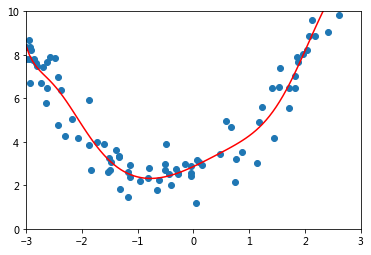

In [12]:
def RidgeRegression(degree,alpha):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('ridge',Ridge(alpha))
    ])
    return pipeline
ModelFit(RidgeRegression(10,0.01))

MSE:2.5498102237213627


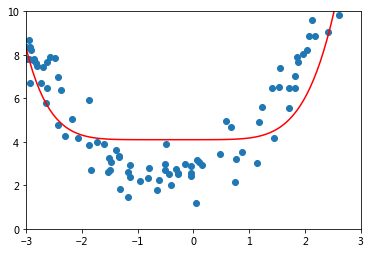

In [13]:
def LassoRegression2(degree):
    pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree)),
    ('reg',LassoCV(eps=0.01,cv=3))#可以自动找到最佳alpha值，model.alpha_
    ])
    return pipeline

ModelFit(LassoRegression2(10))